In [1]:
import pandas as pd
import numpy as np

In [2]:
df_ccm = pd.read_csv('customer_churn_dataset-training-master.csv')

In [3]:
df_ccm.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
print('Sum of Null Values: ')

Sum of Null Values: 


In [5]:
df_ccm.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [6]:
df_ccm = df_ccm.fillna(df_ccm.mean(numeric_only=True))
df_ccm = df_ccm.fillna(df_ccm.mode().iloc[0])
print("Sum of Null Values after cleaning: ")
print(df_ccm.isnull().sum())


Sum of Null Values after cleaning: 
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [7]:
df_ccm = df_ccm.drop("CustomerID", axis=1)

In [8]:
df_ccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440833 non-null  float64
 1   Gender             440833 non-null  object 
 2   Tenure             440833 non-null  float64
 3   Usage Frequency    440833 non-null  float64
 4   Support Calls      440833 non-null  float64
 5   Payment Delay      440833 non-null  float64
 6   Subscription Type  440833 non-null  object 
 7   Contract Length    440833 non-null  object 
 8   Total Spend        440833 non-null  float64
 9   Last Interaction   440833 non-null  float64
 10  Churn              440833 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['Gender', 'Subscription Type', 'Contract Length']:
    df_ccm[col] = label_encoder.fit_transform(df_ccm[col])
df_ccm[['Gender', 'Subscription Type', 'Contract Length']] = df_ccm[['Gender', 'Subscription Type', 'Contract Length']].astype('int64')

In [10]:
df_ccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440833 non-null  float64
 1   Gender             440833 non-null  int64  
 2   Tenure             440833 non-null  float64
 3   Usage Frequency    440833 non-null  float64
 4   Support Calls      440833 non-null  float64
 5   Payment Delay      440833 non-null  float64
 6   Subscription Type  440833 non-null  int64  
 7   Contract Length    440833 non-null  int64  
 8   Total Spend        440833 non-null  float64
 9   Last Interaction   440833 non-null  float64
 10  Churn              440833 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 37.0 MB


In [11]:
df_ccm.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [ ]:
# Feature Selection

<Axes: >

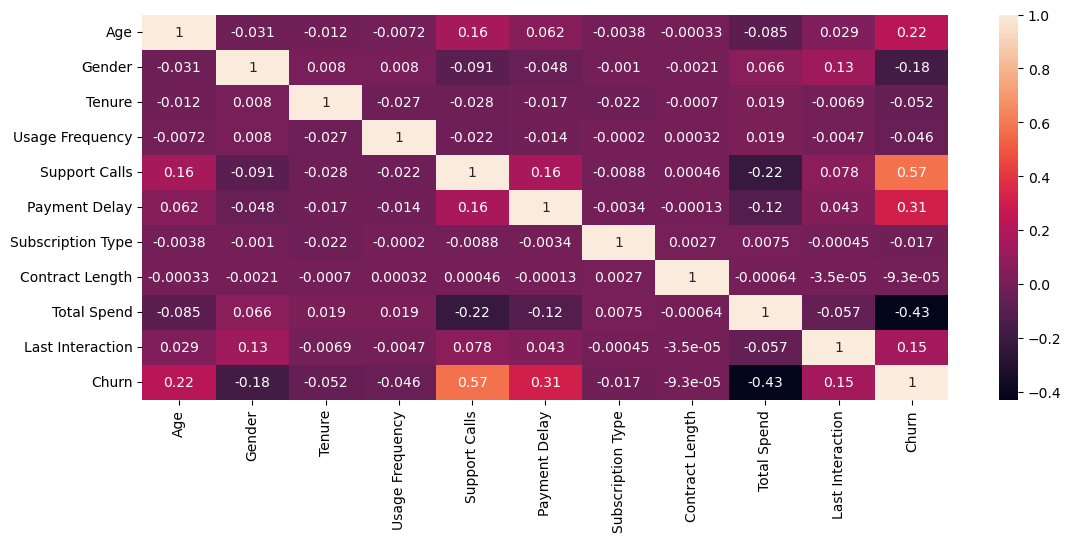

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(13,5))
sns.heatmap(df_ccm.corr(), annot = True)

In [14]:
df_ccm.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [15]:
col_list = list(df_ccm.columns)[0:-1]

In [16]:
x = df_ccm[col_list]

In [17]:
y = df_ccm['Churn']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
print('Training Input: ' ,x_train.shape)
print('Training Output: ',y_train.shape)
print('Testing Input: ',x_test.shape)
print('Testing Output: ',y_test.shape)

Training Input:  (352666, 10)
Training Output:  (352666,)
Testing Input:  (88167, 10)
Testing Output:  (88167,)


In [55]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [21]:
# ✅ Auto-fix target (y) if it's not binary or integer type
if y_train.dtype != 'int64' and y_train.dtype != 'int32':
    # If it's Yes/No or categorical → LabelEncode
    if y_train.dtype == 'object':
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)
    else:
        # If it's numeric continuous → Convert to 0/1 using threshold
        y_train = (y_train > y_train.mean()).astype(int)
        y_test = (y_test > y_test.mean()).astype(int)


In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:

pred = model.predict(x_test)


In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test, pred) * 100, 2), "%")

Accuracy: 99.97 %


In [26]:
import pickle

# Example: if your model is stored in `model`
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl
